# Healthcare Analytics
# Project

# Table of Contents

* [Importing Packages](#1)
* [Importing Dataset](#2)
* [Exploratory data analysis](#3)
* [Creating feature and target dataframes](#4)
* [Splitting the data](#5)
* [Scaling data (Using MinMaxScaler)](#6)
* [Building the Models using grid search](#7)
    * [Naive Bayes](#7.1)
    * [SVM](#7.2)
    * [Decision Tree](#7.3)
    * [RandomForest](#7.4)
    * [ADA Boost](#7.5)
    * [KNN](#7.6)
    * [Multilayer Perceptron](#7.7)
* [Evaluating the models](#8)
* [Plotting Train & Test Accuracies](#9)
* [Bagging](#10)
* [Voting](#11)
* [Feature Engineering](#12)
* [References](#13)

## Importing packages <a id="1"></a>

In [1]:
#importing packages

import numpy as np                         # to perform array operations
import pandas as pd                        # to deal with dataframes and to read the data file
import matplotlib.pyplot as plt            #to plot graphs
import random
import warnings
import seaborn as sns                      #to visualize graphs

from sklearn.model_selection import GridSearchCV        #to perform gridsearch in models
from sklearn.ensemble import RandomForestClassifier     #importing Randomforest classifier
from sklearn.tree import DecisionTreeClassifier         #importing decision tree
from sklearn.svm import SVC                             #importing support vector machine and using support vector classifier
from sklearn.neighbors import KNeighborsClassifier      #importing K Neighbors classifier
from sklearn.ensemble import AdaBoostClassifier         #importing the Ada boosting classifier
from sklearn.neural_network import MLPClassifier        #importing Multilayer perceptron
from sklearn.naive_bayes import GaussianNB              #importing Gaussian Naive bayes
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

warnings.filterwarnings('ignore')                       #to ignore warnings

## Importing data <a id="2"></a>

### Reading the data

In [2]:
#reading the csv file using pandas .read_csv() method

heart_data = pd.read_csv("heart.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Feature Description:
- age=age in years
- sex=(1 = male; 0 = female)
- cp=chest pain type (4 values)
 - Value 0: typical angina
 - Value 1: atypical angina
 - Value 2: non-anginal pain
 - Value 3: asymptomatic
-  trestbps=resting blood pressure (in mm Hg on admission to the hospital)
- chol=serum cholestoral in mg/dl
- fbs=fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- restecg=resting electrocardiographic results (values 0,1,2)
 - Value 0: normal
 - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach=maximum heart rate achieved
- exang=exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope=the slope of the peak exercise ST segment
 - Value 0: upsloping
 - Value 1: flat
 - Value 2: downsloping
- ca=number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target/Decision= refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 1 .    

In [3]:
heart_data.shape

(303, 14)

## Data Processing

In [4]:
#to get the column information, with rows, not null and their data types
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#statiscally describing the column information
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Exploratory data analysis <a id="3"></a>

### checking missing values

In [6]:
# Checking the missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

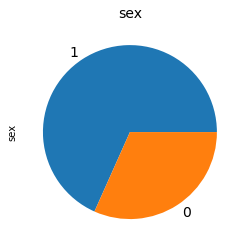

In [7]:
#calculate the percentage of  category.
#heart_data.sex.value_counts(normalize=True)

#plot the pie chart of education categories
heart_data.sex.value_counts(normalize=True).plot.pie(textprops={'fontsize': 14})
plt.title('sex',fontsize=14)
plt.show()

<AxesSubplot:>

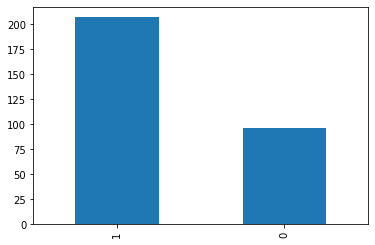

In [8]:
heart_data['sex'].value_counts().plot(kind='bar')

In [9]:
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']

<AxesSubplot:ylabel='sex'>

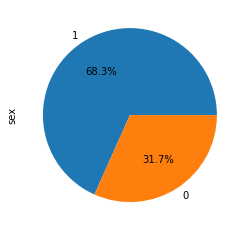

In [10]:
heart_data['sex'].value_counts().plot.pie(autopct='%1.1f%%')

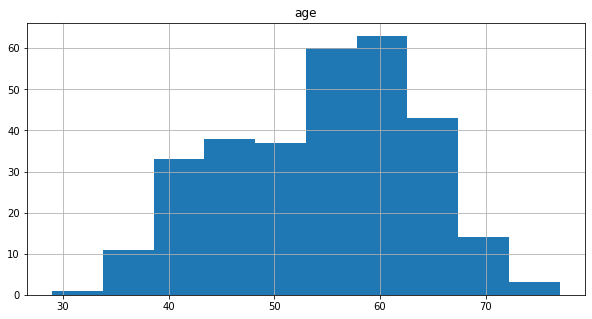

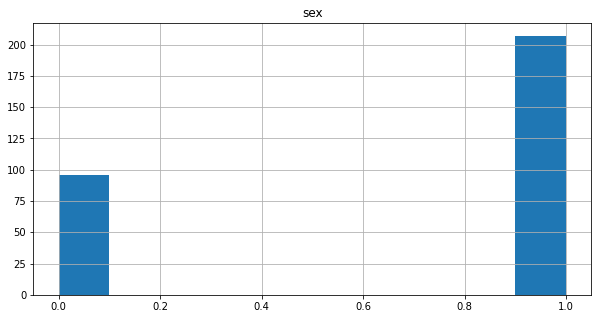

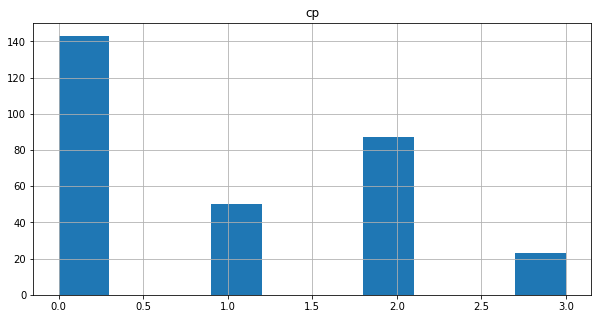

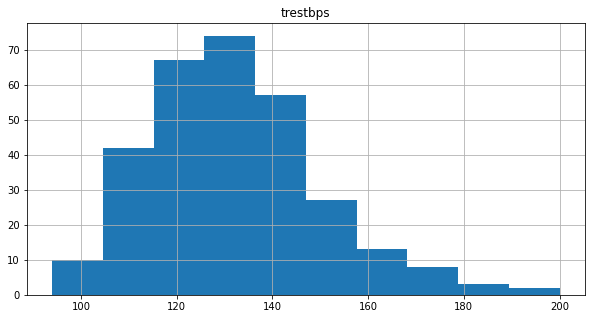

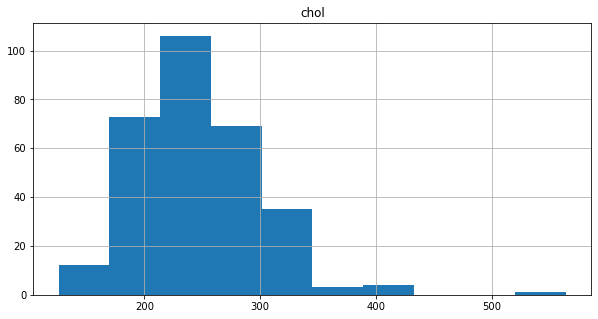

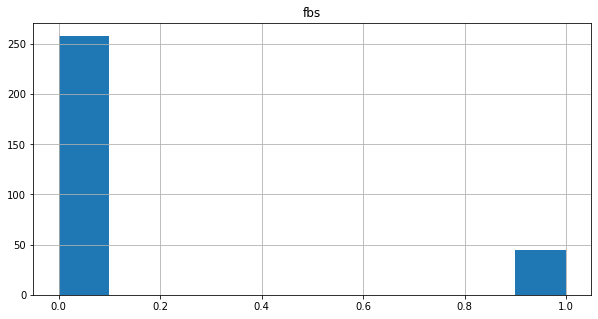

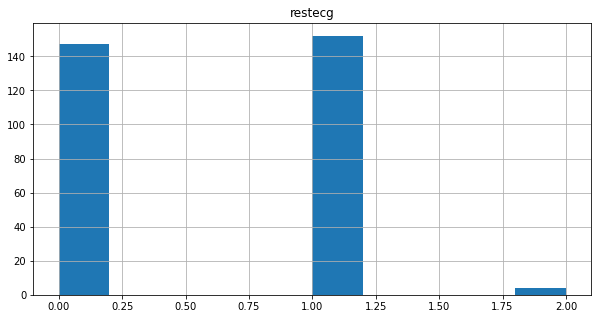

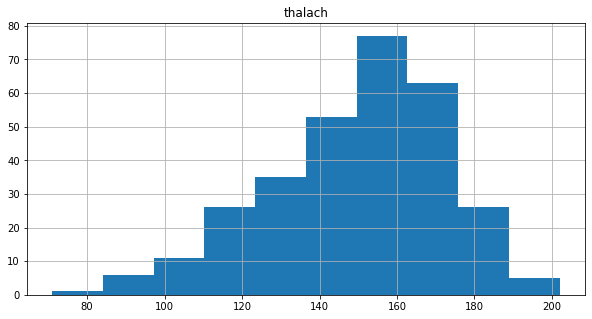

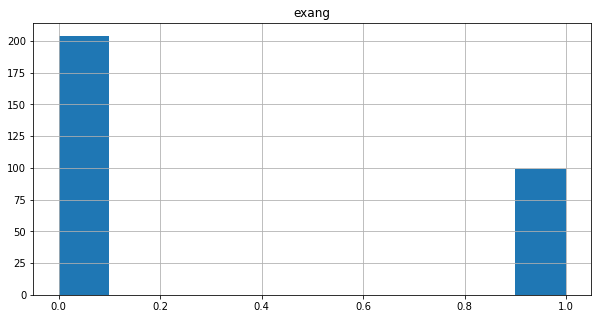

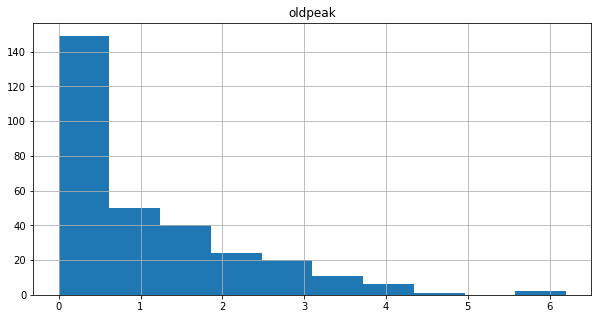

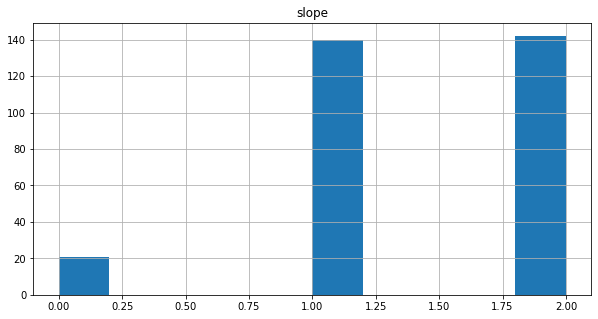

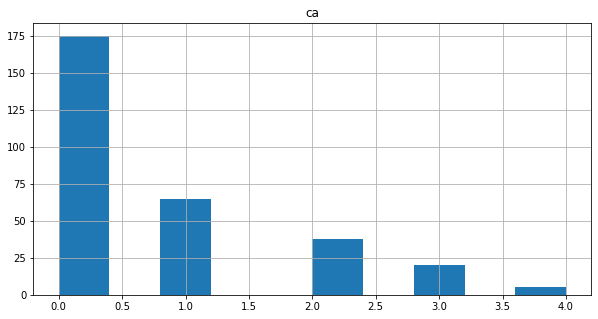

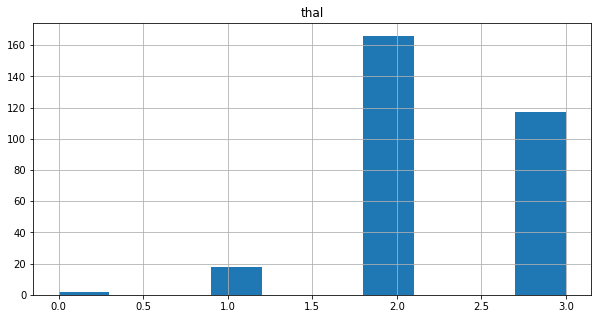

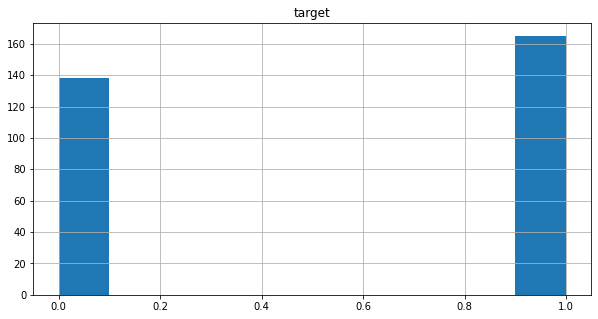

In [11]:
# The simple way
for i in heart_data.columns:
    fig = plt.figure(figsize = (10,5))
    ax = fig.gca()
    #df.hist(ax = ax)
    heart_data.hist(i,ax = ax)

### Description of above Histograms 

- Age: The age histogram shows that majority of the patients belonged to the age range between 52-63, and extremely low num of patients under 35 years and even above 70 years.

- Sex: The proportion of male patients are nearly double the size of the female patients depicting that males are more exposed to heart disease 

- Cp= the histogram shows that majority of the patients brought to the hospital had chest pain type 0, showing the typical angina, and the asymptomatic chest pain (type 3) was seen in minor number of patients 

- Trestbps= the highest resting blood pressure was within the range of 120-130 mm Hg on admission to the hospital and the lowest resting blood pressure was seen in the range of 180 to 200 mm Hg.

- Chol= serum cholesterol of 210-260 mg/dl has the highest frequency with the lowest frequency being 350 -390 mg/dl 

- Fbs= majority of patients fasting blood sugar was below 120 mg/dl and very little higher than 120 mg/dl

- Restecg= having a normal resting ECG result and those having ST-T wave abnormality have the highest numbers,  with type 1 (having ST-T wave abnormality) being slightly higher. However, type 2 which shows a probable or definite left ventricular hypertrophy is extremely low.

- Thalach= Most of the patients came in with a maximum heart rate achieved is within the range of 150-162 and few with a heart rate within 50-85 which is extremely low. Looking at the histogram we see that there have been patients who have been admitted with the max heart rate of 202 as well which is known to be extremely severe. 

- Exang= stable angina is usually triggered or induced by physical activity. When you climb stairs, exercise or walk, your heart demands more blood, but narrowed arteries slow down blood flow. Thus, what the histogram is depicting is that nearly 200 patients’ angina was not induced by exercise, however around half (100 records) were triggered.

- Oldpeak= Normal ST segment depressions occur during physical exercise. These ST segment depressions have an upsloping ST segment. The depression in the J 60 point is usually <1 mm and they resolve rapidly once the exercise is stopped. According to the definition of this feature wee see that the highest ST depression induced by exercise relative to rest shows highest frequency when below 1 mm. 

- Slope= as described in previous feature “oldpeak” we understand that a normal ST segment depression occurs during exercise and has an upsloping ST segment. In the histogram related to this feature we see that number of upsloping, showing a normal ST segment, is extremely low in comparison to that of the flat and down sloping that indicate coronary ischemia, both being very high with a similar frequency.  

- Ca=

- Thal= 

- Decision= as per the description we know that based on the initial dataset target value is the presence of heart disease if it shows the value of 1 and 0 if heart disease does not exist and by the histogram it is observed that both presence and non-presence values are showing relatively high numbers, with existence of disease being higher. 
  



<AxesSubplot:>

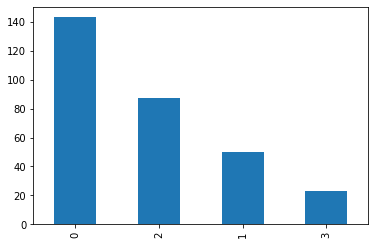

In [12]:
heart_data['cp'].value_counts().plot(kind='bar')

<AxesSubplot:>

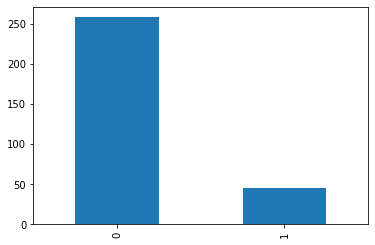

In [13]:
heart_data['fbs'].value_counts().plot(kind='bar')

<AxesSubplot:>

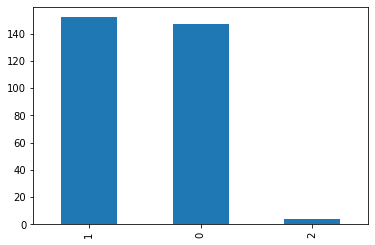

In [14]:
heart_data['restecg'].value_counts().plot(kind='bar')

<AxesSubplot:>

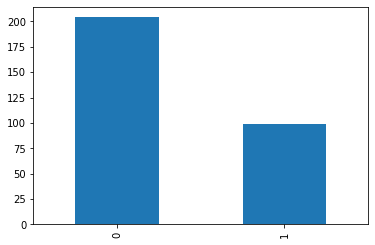

In [15]:
heart_data['exang'].value_counts().plot(kind='bar')

<AxesSubplot:>

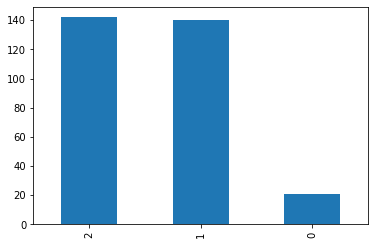

In [16]:
heart_data['slope'].value_counts().plot(kind='bar')

<AxesSubplot:>

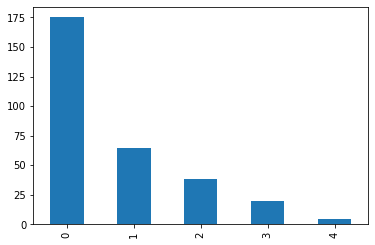

In [17]:
heart_data['ca'].value_counts().plot(kind='bar')

<AxesSubplot:>

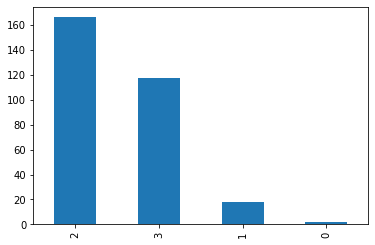

In [18]:
heart_data['thal'].value_counts().plot(kind='bar')

<AxesSubplot:>

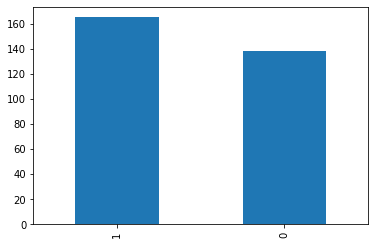

In [19]:
heart_data['target'].value_counts().plot(kind='bar')

<AxesSubplot:>

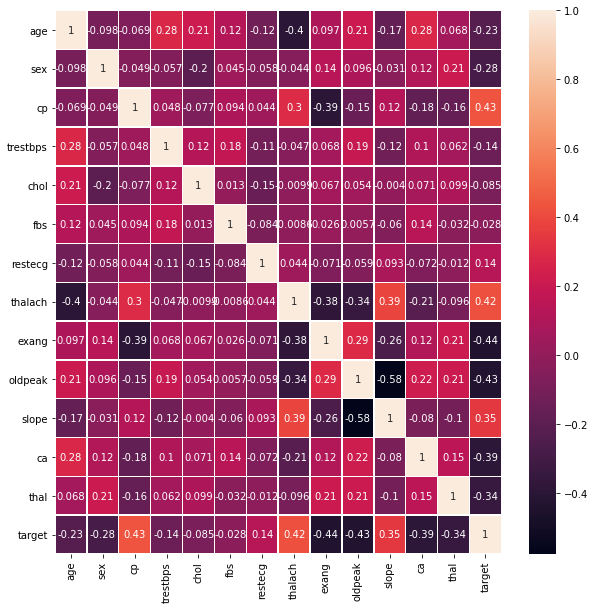

In [20]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(heart_data.corr(), annot=True, linewidths=.5, ax=ax)

- The heatmap shows which features have a positive and negative corrolation and to what degree do they positively or negatively influence each other 
- which is shown by the numbers in the boxes, each representing a color calibration. The dark purple color(-0.58) shows extreme negative corrolation and as it goes towards light pink (1.0)the corrolation becomes extremely positive 
- an overall look at the matrix will give us the percpective that majorly the colors range between -0.5 to 0.5 being mostly purpulish with footprint of negative corroplation scattered 
- The features that are extremely negatievly corrolated are age & thalach,exang & cp, thalach & oldpeak, exang & thalach, exang & decision, exang & cp, slop & oldpeak, oldpeak & decision, ca & decision, etc.

In [21]:
#finding numerical attributes
heart_data_num = heart_data.select_dtypes(include = ['float64', 'int64'])
heart_data_num.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

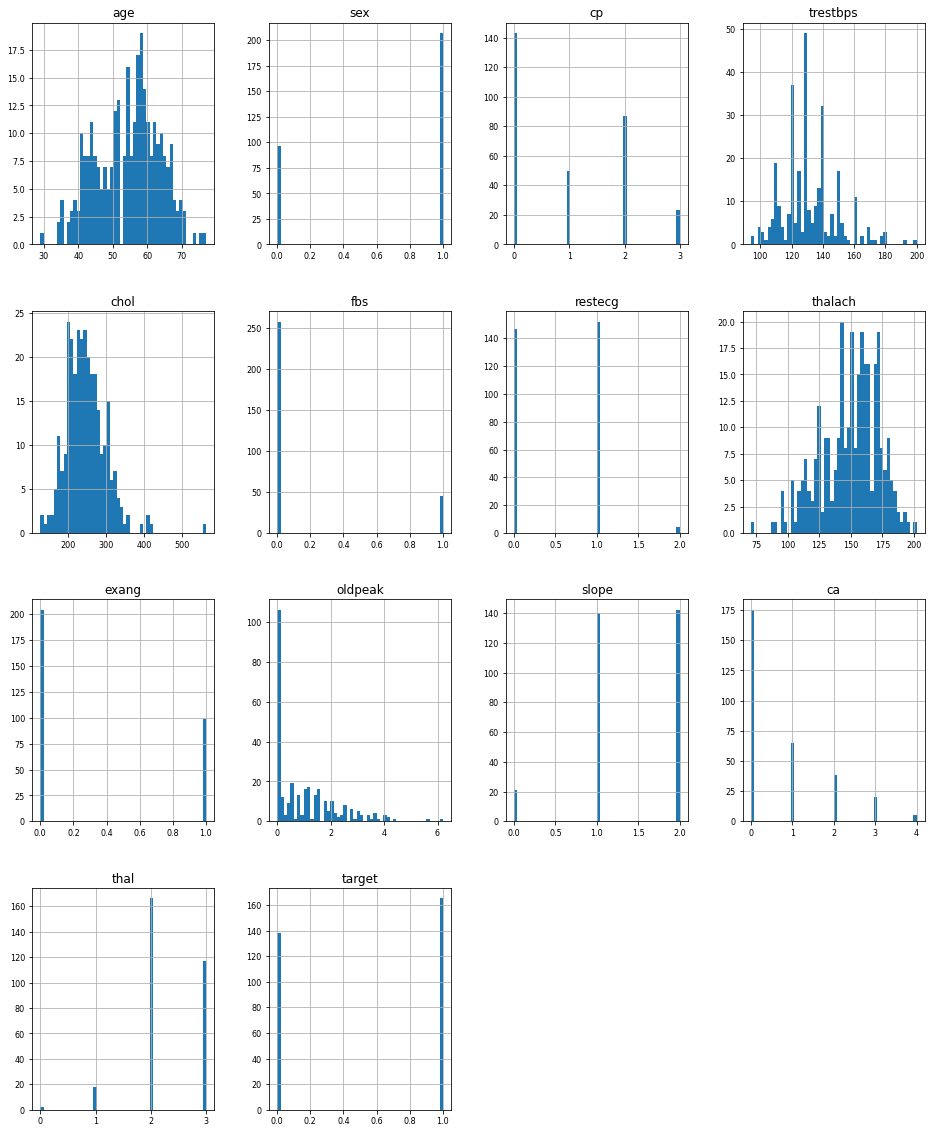

In [22]:
heart_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

## Feature and target dataset creation <a id="4"></a>

In [23]:
#head to display top 5 rows
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
#Creating feature data from dataset
X_df =  heart_data[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
#Shape of feature data frame
print(X_df.shape)

#fetching top 5 records of features
X_df.head()

(303, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
#Creating target data from  dataset
y = heart_data[['target']]

#fetching top records of target
y.head()

,target
0,1
1,1
2,1
3,1
4,1


## Splitting the data <a id="5"></a>

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X_df,y,test_size=0.20,random_state = 0)

### Train, test accuracies and shape

In [27]:
#Train accuracy percentage
print("Training data percentage is {:.2f}".format(len(X_train)/len(heart_data)*100)+" %")
#Test accuracy percentage
print("Test data percentage is {:.2f}".format((len(X_test)/len(heart_data))*100)+" %")

print("\n")

#Tain and test feature dataset shapes
print("Features train shape"+str(X_train.shape))
print("Features test shape"+str(X_test.shape))

print("\n")

#Tain and test target dataset shapes
print("Target train shape"+str(y_train.shape))
print("Target test shape"+str(y_test.shape))

Training data percentage is 79.87 %
Test data percentage is 20.13 %


Features train shape(242, 13)
Features test shape(61, 13)


Target train shape(242, 1)
Target test shape(61, 1)


## Scaling the data <a id="6"></a>

In [28]:
#importing the MinMaxSclaer from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

#creating an object of MinMaxScaler
mms = MinMaxScaler()

#Fitting the training features
mms.fit(X_train)

#transforming the train features
X_train_scaled = mms.transform(X_train)
print(X_train_scaled[0])

print("\n\n")

#transforming the test features
X_test_scaled = mms.transform(X_test)
print(X_test_scaled[0])

[0.29166667 0.         0.66666667 0.28571429 0.18937644 0.
 0.5        0.71755725 0.         0.03225806 0.5        0.
 0.66666667]



[0.85416667 1.         0.         0.52040816 0.09930716 0.
 0.5        0.41221374 1.         0.41935484 0.         0.
 1.        ]


## Building the model <a id="7"></a>
#### Using hyperparameter tuning - 10 Fold Grid Search

#### Building the Naive Bayes model <a id="7.1"></a>

In [29]:
#Building the model

#Creating an object of Naive Bayes
nb = GaussianNB()

#Define parameters 
params_gnb = { }

#Instantiate the grid search model
grid_search_gnb = GridSearchCV(estimator = nb,
                           param_grid = params_gnb,
                           scoring = 'accuracy', 
                           cv = 10,
                           n_jobs= -1,
                           verbose = 1)

#fitting the data
grid_search_gnb = grid_search_gnb.fit(X_train_scaled,y_train)


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.0s finished


In [30]:
#finding the best parameters
best_parameters_gnb = grid_search_gnb.best_params_
print(best_parameters_gnb)

#calculating best score of the model using best_score method
print("\n Best grid search score for Naive Bayes is {:.2f}% \n".format(grid_search_gnb.best_score_*100))

{}

 Best grid search score for Naive Bayes is 81.02% 



#### Building the SVM model <a id="7.2"></a>

In [31]:
#Building the model

#Creating an object of Naive Bayes
svc = SVC(random_state=0)

#Define parameters 
params_svm = {
            'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
                'kernel' : ['linear', 'poly','rbf']
            }

#Instantiate the grid search model
grid_search_svm = GridSearchCV(estimator = svc,
                           param_grid = params_svm,
                           scoring = 'accuracy', 
                           cv = 10,
                           n_jobs= -1,
                           verbose = 1)

#fitting the data
grid_search_svm = grid_search_svm.fit(X_train_scaled,y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 735 out of 750 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    2.1s finished


In [32]:
#finding the best parameters
best_parameters_svm = grid_search_svm.best_params_
print("Best parameters are "+str(best_parameters_svm))

#calculating best score of the model using best_score method
print("\nBest grid search score for SVC is {:.2f}% \n".format(grid_search_svm.best_score_*100))

Best parameters are {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

Best grid search score for SVC is 83.12% 



#### Building the Decision Tree model <a id="7.3"></a>

In [33]:
#Building the model

#Define model and parameters 
tree = DecisionTreeClassifier(random_state=0)

params_DT = {
            'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
             'min_samples_split': [2, 3],
             'max_leaf_nodes':[10,15,20],
             'min_samples_leaf':[10,15,20,25]
            }

#Instantiate the grid search model
grid_search_dt = GridSearchCV(estimator = tree,
                           param_grid = params_DT,
                           scoring = 'accuracy', 
                           cv = 10,
                           n_jobs= -1,
                           verbose = 1)

#fitting the data
grid_search_dt = grid_search_dt.fit(X_train_scaled,y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 384 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 3638 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed:    2.6s finished


In [34]:
#finding the best parameters
best_parameters_DT = grid_search_dt.best_params_
print("Best parameters are "+str(best_parameters_DT))

#calculating best score of the model using best_score method
print("\nBest grid search score for Decision tree is {:.2f}% \n".format(grid_search_dt.best_score_*100))

Best parameters are {'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 15, 'min_samples_leaf': 10, 'min_samples_split': 2}

Best grid search score for Decision tree is 79.02% 



#### Building the Random Forest model <a id="7.4"></a>

In [35]:
#Building the RandomForestClassifier

#creating a object of RandomForestClassifier
rfc = RandomForestClassifier(random_state = 0)

params_rf = {
    'n_estimators':[5,10,50,100,200, 1000],
    'max_depth':[2,5,10,15,None],
    'max_features': ['sqrt', 'log2']
    
}


#Instantiate the grid search model
grid_search_rfc = GridSearchCV(estimator = rfc,
                           param_grid = params_rf,
                           scoring = 'accuracy', 
                           cv = 10,
                           n_jobs= -1,
                           verbose = 1)

#fitting the data
grid_search = grid_search_rfc.fit(X_train_scaled,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   46.8s finished


In [36]:
#finding the best parameters
best_parameters_rf = grid_search_rfc.best_params_
print("Best parameters are "+str(best_parameters_rf))

#calculating best score of the model using best_score method
print("\nBest grid search score for RandomForest is {:.2f}% \n".format(grid_search_rfc.best_score_*100))

Best parameters are {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}

Best grid search score for RandomForest is 85.15% 



#### Building the Ada Boost model <a id="7.5"></a>

In [37]:
#Building the ADA Boost

#creating a object of AdaBoostClassifier
abc = AdaBoostClassifier(random_state = 0)

params_ada = {
    'n_estimators':[10,50,100,200, 1000],
    'learning_rate':[0.001,0.01,0.1,0.2,0.5]    
}


#Instantiate the grid search model
grid_search_ada = GridSearchCV(estimator = abc,
                           param_grid = params_ada,
                           scoring = 'accuracy', 
                           cv = 10,
                           n_jobs= -1,
                           verbose = 1)

#fitting the data
grid_search_ada = grid_search_ada.fit(X_train_scaled,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   23.5s finished


In [38]:
#finding the best parameters
best_parameters_ada = grid_search_ada.best_params_
print("Best parameters are "+str(best_parameters_ada))

#calculating best score of the model using best_score method
print("\nBest grid search score for ADA Boost is {:.2f}% \n".format(grid_search_ada.best_score_*100))

Best parameters are {'learning_rate': 0.5, 'n_estimators': 10}

Best grid search score for ADA Boost is 82.68% 



#### Building the KNN model <a id="7.6"></a>

In [39]:
#Building the KNN model
#Importing the KNN from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier


#creating a object of KNN
knn = KNeighborsClassifier(n_jobs=-1)

params_knn = {
    'n_neighbors':range(1,21,2),
    'weights':['uniform', 'distance'],
    'metric':['euclidean', 'manhattan', 'minkowski']
}


#Instantiate the grid search model
grid_search_knn = GridSearchCV(estimator = knn,
                           param_grid = params_knn,
                           scoring = 'accuracy', 
                           cv = 10,
                           n_jobs= -1,
                           verbose = 1)

#fitting the data
grid_search_knn = grid_search_knn.fit(X_train_scaled,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    9.3s finished


In [40]:
#finding the best parameters
best_parameters_knn = grid_search_knn.best_params_
print("Best parameters are "+str(best_parameters_knn))

#calculating best score of the model using best_score method
print("\nBest grid search score for KNN is {:.2f}% \n".format(grid_search_knn.best_score_*100))

Best parameters are {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

Best grid search score for KNN is 83.90% 



#### Building the Multilayer perceptron model <a id="7.7"></a>

In [41]:
#Building the MLP

#creating a object of MLPClassifier
mlp = MLPClassifier(random_state = 0)

#paramter grid
params_mlp = {
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001,0.01,0.1,0.2, 0.05],
    'learning_rate': ['constant','adaptive','invscaling']
    }


#Instantiate the grid search model
grid_search_mlp = GridSearchCV(estimator = mlp,
                           param_grid = params_mlp,
                           scoring = 'accuracy', 
                           cv = 10,
                           n_jobs= -1,
                           verbose = 1)
#fitting the data
grid_search_mlp = grid_search_mlp.fit(X_train_scaled,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  1.1min finished


In [42]:
#finding the best parameters
best_parameters_mlp = grid_search_mlp.best_params_
print("Best parameters are "+str(best_parameters_mlp))

#calculating best score of the model using best_score method
print("\nBest grid search score for MLP is {:.2f}% \n".format(grid_search_knn.best_score_*100))

Best parameters are {'activation': 'logistic', 'alpha': 0.1, 'learning_rate': 'constant', 'solver': 'lbfgs'}

Best grid search score for MLP is 83.90% 



#### Building C 4.5 model <a id="7.8"></a>

In [43]:
heart_data.rename(columns={'target': 'Decision'}, inplace=True)
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Decision
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
#Building the model

from chefboost import Chefboost as chef
config = {'algorithm': 'C4.5'}
model = chef.fit(heart_data, config)

Regression  tree is going to be built...
MAE:  0.07150715071507151
RMSE:  0.193400466323216
Mean:  0.5445544554455446
MAE / Mean:  13.13131313131313 %
RMSE / Mean:  35.51535836117239 %
finished in  1.7439780235290527  seconds


In [45]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Decision
0,>54,>0,>0,>106,<=245,>0,<=0,>147,<=0,>1.6,<=1,<=0,<=2,1
1,<=54,>0,>0,>106,>245,<=0,>0,>147,<=0,>1.6,<=1,<=0,<=2,1
2,<=54,<=0,>0,>106,<=245,<=0,<=0,>147,<=0,<=1.6,>1,<=0,<=2,1
3,>54,>0,>0,>106,<=245,<=0,>0,>147,<=0,<=1.6,>1,<=0,<=2,1
4,>54,<=0,<=0,>106,>245,<=0,>0,>147,>0,<=1.6,>1,<=0,<=2,1


## Evaluating the model <a id="8"></a>

- Each model will be evaluated based on 5 different methods;
 - Train Test Accuracy 
 - Confusion Matrix
 - Classification Report 
 - AUC Value (Area Under Curve)
 - ROC Curve (Receiver Operating characteristics)

### Train Test Accuracy

In [46]:
train_accuracies = []
test_accuracies = []

#### Evaluating c 4.5 model

#### Evaluating the Naive Bayes model

In [47]:
#predicting target for Naive bayes
y_pred_nb = grid_search_gnb.predict(X_test_scaled)
print(y_pred_nb[0:5])

[0 1 1 0 0]


#### Train Test accuracy for Naive Bayes Model

Train accuracy of Naive Bayes 83.47%
Test accuracy of Naive Bayes 85.25%


 Classification report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



  Confusion Matrix for Naive Bayes:


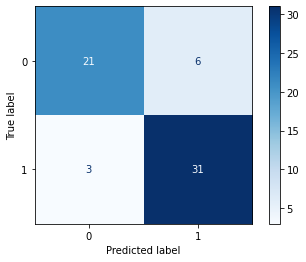

AUC value i.e Area Under Curve 


Area Under the Curve = 0.8447712418300652 


ROC Curve 




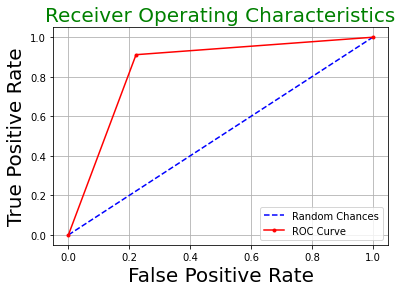

In [48]:
#importing accuracy_score from sklearn.metrics
#The accuracy score which helps in calculating the train and test accuracy based on the number of correctly classified data
from sklearn.metrics import accuracy_score

#calculating train accuracy for Naive Bayes
train_nb_accuracy = grid_search_gnb.score(X_train_scaled,y_train)
print("Train accuracy of Naive Bayes {:.2f}%".format(train_nb_accuracy*100))
train_accuracies.append(train_nb_accuracy)

#calculating test accuracy for Naive Bayes
test_nb_accuracy = accuracy_score(y_test,y_pred_nb)
print("Test accuracy of Naive Bayes {:.2f}%".format(test_nb_accuracy*100))
test_accuracies.append(test_nb_accuracy)

#importing the classification report and confusin matrix from sklearn.metric
from sklearn.metrics import classification_report,confusion_matrix

clf = classification_report(y_test,y_pred_nb)
print("\n\n Classification report for Naive Bayes:")
print(clf)

from sklearn.metrics import plot_confusion_matrix
print("\n\n  Confusion Matrix for Naive Bayes:")
plot_confusion_matrix(grid_search_gnb,X_test_scaled, y_test,cmap=plt.cm.Blues)
plt.show()

#Calculate AUC Value
print("AUC value i.e Area Under Curve \n\n")
auc_gnb = roc_auc_score(y_test,y_pred_nb)
print("Area Under the Curve = %s \n\n" %auc_gnb)

#Plot ROC Curve
print("ROC Curve \n\n")

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]


fpr_dt, tpr_dt, _ = roc_curve(y_test,y_pred_nb)                    # to plot random chances
ns_fpr,ns_tpr, _ = roc_curve(y_test, ns_probs)                       # to plot roc curve for the model



# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Chances',color='Blue') # plot the random chances for the model
plt.plot(fpr_dt, tpr_dt, marker='.', label='ROC Curve',color='Red')# plot the roc curve for the model
# axis labels
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver Operating Characteristics',fontsize=20,color='green')
plt.legend()
plt.grid()

#### Evaluating the SVM model

In [49]:
#predicting target for SVC
y_pred_svc = grid_search_svm.predict(X_test_scaled)
print(y_pred_svc[0:5])

[0 1 1 0 0]


#### Train Test accuracy for SVC Model

Train accuracy of SVC 90.08%
Test accuracy of SVC 85.25%


 Classification report for SVC:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



  Confusion Matrix for SVC:


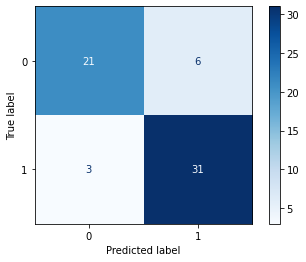

AUC value i.e Area Under Curve 


Area Under the Curve = 0.8447712418300652 


ROC Curve 




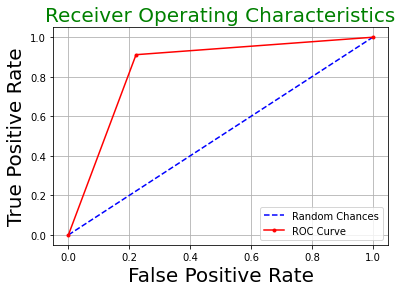

In [50]:
#importing accuracy_score from sklearn.metrics
#The accuracy score which helps in calculating the train and test accuracy based on the number of correctly classified data
from sklearn.metrics import accuracy_score

#calculating train accuracy for SVC
train_svc_accuracy = grid_search_svm.score(X_train_scaled,y_train)
print("Train accuracy of SVC {:.2f}%".format(train_svc_accuracy*100))
train_accuracies.append(train_svc_accuracy)

#calculating test accuracy for svc
test_svc_accuracy = accuracy_score(y_test,y_pred_svc)
print("Test accuracy of SVC {:.2f}%".format(test_svc_accuracy*100))
test_accuracies.append(test_svc_accuracy)

#importing the classification report and confusin matrix from sklearn.metric
from sklearn.metrics import classification_report,confusion_matrix

clf = classification_report(y_test,y_pred_svc)
print("\n\n Classification report for SVC:")
print(clf)

from sklearn.metrics import plot_confusion_matrix
print("\n\n  Confusion Matrix for SVC:")
plot_confusion_matrix(grid_search_svm,X_test_scaled, y_test,cmap=plt.cm.Blues)
plt.show()

#Calculate AUC Value
print("AUC value i.e Area Under Curve \n\n")
auc_svc = roc_auc_score(y_test,y_pred_svc)
print("Area Under the Curve = %s \n\n" %auc_svc)

#Plot ROC Curve
print("ROC Curve \n\n")

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]


fpr_dt, tpr_dt, _ = roc_curve(y_test,y_pred_svc)                    # to plot random chances
ns_fpr,ns_tpr, _ = roc_curve(y_test, ns_probs)                       # to plot roc curve for the model



# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Chances',color='Blue') # plot the random chances for the model
plt.plot(fpr_dt, tpr_dt, marker='.', label='ROC Curve',color='Red')# plot the roc curve for the model
# axis labels
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver Operating Characteristics',fontsize=20,color='green')
plt.legend()
plt.grid()

#### Evaluating the DecisionTree model

In [51]:
#predicting target for DecisionTree
y_pred_tree = grid_search_dt.predict(X_test_scaled)
print(y_pred_tree[0:5])

[0 1 0 0 1]


#### Train Test accuracy for Decision tree Model

Train accuracy of Decision tree 85.54%
Test accuracy of Decision tree 81.97%


 Classification report for Decision Tree:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.85      0.82      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



  Confusion Matrix for Decision Tree:


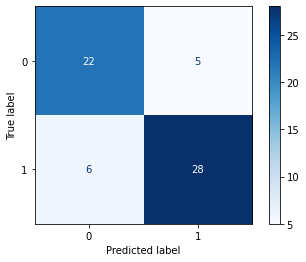

AUC value i.e Area Under Curve 


Area Under the Curve = 0.8191721132897605 


ROC Curve 




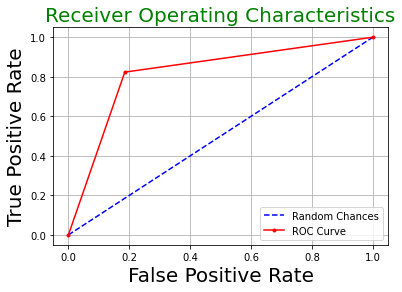

In [52]:
#importing accuracy_score from sklearn.metrics
#The accuracy score which helps in calculating the train and test accuracy based on the number of correctly classified data
from sklearn.metrics import accuracy_score

#calculating train accuracy for Decision tree
train_tree_accuracy = grid_search_dt.score(X_train_scaled,y_train)
print("Train accuracy of Decision tree {:.2f}%".format(train_tree_accuracy*100))
train_accuracies.append(train_tree_accuracy)

#calculating test accuracy for Decision tree
test_tree_accuracy = accuracy_score(y_test,y_pred_tree)
print("Test accuracy of Decision tree {:.2f}%".format(test_tree_accuracy*100))
test_accuracies.append(test_tree_accuracy)

#importing the classification report and confusin matrix from sklearn.metric
from sklearn.metrics import classification_report,confusion_matrix

clf = classification_report(y_test,y_pred_tree)
print("\n\n Classification report for Decision Tree:")
print(clf)

from sklearn.metrics import plot_confusion_matrix
print("\n\n  Confusion Matrix for Decision Tree:")
plot_confusion_matrix(grid_search_dt,X_test_scaled, y_test,cmap=plt.cm.Blues)
plt.show()

#Calculate AUC Value
print("AUC value i.e Area Under Curve \n\n")
auc_gnb = roc_auc_score(y_test,y_pred_tree)
print("Area Under the Curve = %s \n\n" %auc_gnb)

#Plot ROC Curve
print("ROC Curve \n\n")

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]


fpr_dt, tpr_dt, _ = roc_curve(y_test,y_pred_tree)                    # to plot random chances
ns_fpr,ns_tpr, _ = roc_curve(y_test, ns_probs)                       # to plot roc curve for the model



# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Chances',color='Blue') # plot the random chances for the model
plt.plot(fpr_dt, tpr_dt, marker='.', label='ROC Curve',color='Red')# plot the roc curve for the model
# axis labels
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver Operating Characteristics',fontsize=20,color='green')
plt.legend()
plt.grid()

#### Evaluating the Random Forest model

In [53]:
#predicting target for DecisionTree
y_pred_rfc = grid_search_rfc.predict(X_test_scaled)
print(y_pred_rfc[0:5])

[0 1 1 0 0]


#### Train Test accuracy for Random forest Model

Train accuracy of Random Forest 93.80%
Test accuracy of Random Forest 85.25%


 Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



  Confusion Matrix for Random Forest:


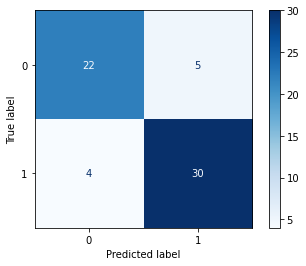

AUC value i.e Area Under Curve 


Area Under the Curve = 0.8485838779956427 


ROC Curve 




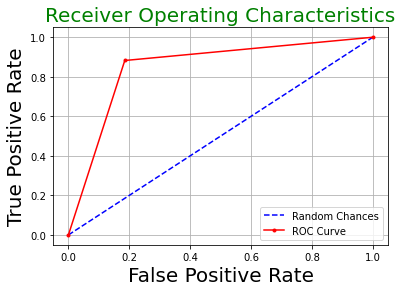

In [54]:
#importing accuracy_score from sklearn.metrics
#The accuracy score which helps in calculating the train and test accuracy based on the number of correctly classified data
from sklearn.metrics import accuracy_score

#calculating train accuracy for Random Forest
train_rfc_accuracy = grid_search_rfc.score(X_train_scaled,y_train)
print("Train accuracy of Random Forest {:.2f}%".format(train_rfc_accuracy*100))
train_accuracies.append(train_rfc_accuracy)

#calculating test accuracy for Random Forest
test_rfc_accuracy = accuracy_score(y_test,y_pred_rfc)
print("Test accuracy of Random Forest {:.2f}%".format(test_rfc_accuracy*100))
test_accuracies.append(test_rfc_accuracy)

#importing the classification report and confusin matrix from sklearn.metric
from sklearn.metrics import classification_report,confusion_matrix

clf = classification_report(y_test,y_pred_rfc)
print("\n\n Classification report for Random Forest:")
print(clf)

from sklearn.metrics import plot_confusion_matrix
print("\n\n  Confusion Matrix for Random Forest:")
plot_confusion_matrix(grid_search_rfc,X_test_scaled, y_test,cmap=plt.cm.Blues)
plt.show()

#Calculate AUC Value
print("AUC value i.e Area Under Curve \n\n")
auc_gnb = roc_auc_score(y_test,y_pred_rfc)
print("Area Under the Curve = %s \n\n" %auc_gnb)

#Plot ROC Curve
print("ROC Curve \n\n")

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]


fpr_dt, tpr_dt, _ = roc_curve(y_test,y_pred_rfc)                    # to plot random chances
ns_fpr,ns_tpr, _ = roc_curve(y_test, ns_probs)                       # to plot roc curve for the model



# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Chances',color='Blue') # plot the random chances for the model
plt.plot(fpr_dt, tpr_dt, marker='.', label='ROC Curve',color='Red')# plot the roc curve for the model
# axis labels
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver Operating Characteristics',fontsize=20,color='green')
plt.legend()
plt.grid()

#### Evaluating the ADABoost model

In [55]:
#predicting target for DecisionTree
y_pred_abc = grid_search_ada.predict(X_test_scaled)
print(y_pred_abc[0:5])

[0 1 1 0 0]


#### Train Test accuracy for ADA Boost Model

Train accuracy of ADABoost 88.02%
Test accuracy of ADABoost 83.61%


 Classification report for ADA Boost:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



  Confusion Matrix for ADA Boost:


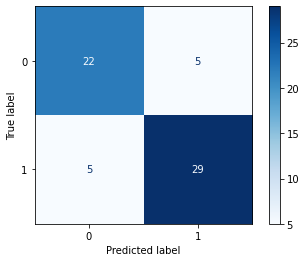

AUC value i.e Area Under Curve 


Area Under the Curve = 0.8338779956427016 


ROC Curve 




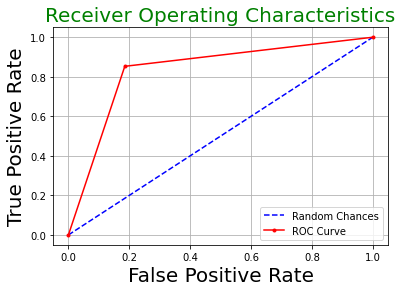

In [56]:
#importing accuracy_score from sklearn.metrics
#The accuracy score which helps in calculating the train and test accuracy based on the number of correctly classified data
from sklearn.metrics import accuracy_score

#calculating train accuracy for ADABoost
train_abc_accuracy = grid_search_ada.score(X_train_scaled,y_train)
print("Train accuracy of ADABoost {:.2f}%".format(train_abc_accuracy*100))
train_accuracies.append(train_abc_accuracy)

#calculating test accuracy for ADABoost
test_abc_accuracy = accuracy_score(y_test,y_pred_abc)
print("Test accuracy of ADABoost {:.2f}%".format(test_abc_accuracy*100))
test_accuracies.append(test_abc_accuracy)

#importing the classification report and confusin matrix from sklearn.metric
from sklearn.metrics import classification_report,confusion_matrix

clf = classification_report(y_test,y_pred_abc)
print("\n\n Classification report for ADA Boost:")
print(clf)

from sklearn.metrics import plot_confusion_matrix
print("\n\n  Confusion Matrix for ADA Boost:")
plot_confusion_matrix(grid_search_ada,X_test_scaled, y_test,cmap=plt.cm.Blues)
plt.show()

#Calculate AUC Value
print("AUC value i.e Area Under Curve \n\n")
auc_gnb = roc_auc_score(y_test,y_pred_abc)
print("Area Under the Curve = %s \n\n" %auc_gnb)

#Plot ROC Curve
print("ROC Curve \n\n")

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]


fpr_dt, tpr_dt, _ = roc_curve(y_test,y_pred_abc)                    # to plot random chances
ns_fpr,ns_tpr, _ = roc_curve(y_test, ns_probs)                       # to plot roc curve for the model



# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Chances',color='Blue') # plot the random chances for the model
plt.plot(fpr_dt, tpr_dt, marker='.', label='ROC Curve',color='Red')# plot the roc curve for the model
# axis labels
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver Operating Characteristics',fontsize=20,color='green')
plt.legend()
plt.grid()

#### Evaluating the KNN model

In [57]:
#predicting target for KNN
y_pred_knn = grid_search_knn.predict(X_test_scaled)
print(y_pred_knn[0:5])

[0 0 0 0 0]


#### Train Test accuracy for KNN Model

Train accuracy of KNN 100.00%
Test accuracy of KNN 85.25%


 Classification report for KNN:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



  Confusion Matrix for KNN:


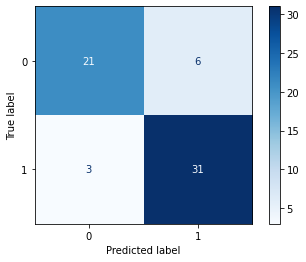

AUC value i.e Area Under Curve 


Area Under the Curve = 0.8447712418300652 


ROC Curve 




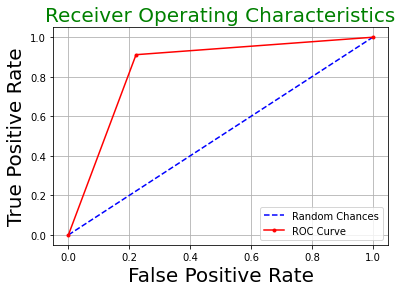

In [58]:
#importing accuracy_score from sklearn.metrics
#The accuracy score which helps in calculating the train and test accuracy based on the number of correctly classified data
from sklearn.metrics import accuracy_score

#calculating train accuracy for KNN
train_knn_accuracy = grid_search_knn.score(X_train_scaled,y_train)
print("Train accuracy of KNN {:.2f}%".format(train_knn_accuracy*100))
train_accuracies.append(train_knn_accuracy)

#calculating test accuracy for KNN
test_knn_accuracy = accuracy_score(y_test,y_pred_knn)
print("Test accuracy of KNN {:.2f}%".format(test_knn_accuracy*100))
test_accuracies.append(test_knn_accuracy)

#importing the classification report and confusin matrix from sklearn.metric
from sklearn.metrics import classification_report,confusion_matrix

clf = classification_report(y_test,y_pred_knn)
print("\n\n Classification report for KNN:")
print(clf)

from sklearn.metrics import plot_confusion_matrix
print("\n\n  Confusion Matrix for KNN:")
plot_confusion_matrix(grid_search_knn,X_test_scaled, y_test,cmap=plt.cm.Blues)
plt.show()

#Calculate AUC Value
print("AUC value i.e Area Under Curve \n\n")
auc_gnb = roc_auc_score(y_test,y_pred_knn)
print("Area Under the Curve = %s \n\n" %auc_gnb)

#Plot ROC Curve
print("ROC Curve \n\n")

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]


fpr_dt, tpr_dt, _ = roc_curve(y_test,y_pred_knn)                    # to plot random chances
ns_fpr,ns_tpr, _ = roc_curve(y_test, ns_probs)                       # to plot roc curve for the model



# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Chances',color='Blue') # plot the random chances for the model
plt.plot(fpr_dt, tpr_dt, marker='.', label='ROC Curve',color='Red')# plot the roc curve for the model
# axis labels
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver Operating Characteristics',fontsize=20,color='green')
plt.legend()
plt.grid()

#### Evaluating the Multilayer perceptron model

In [59]:
#predicting target for MLP
y_pred_mlp = grid_search_mlp.predict(X_test_scaled)
print(y_pred_mlp[0:5])

[0 1 1 0 0]


#### Train Test accuracy for MLP Model

Train accuracy of MLP 92.98%
Test accuracy of MLP 86.89%


 Classification report for Multilayer Perceptron:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



  Confusion Matrix for Multilayer Perceptron:


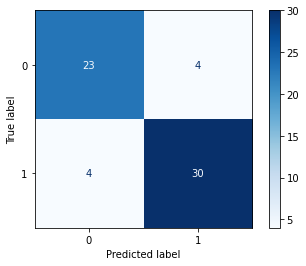

AUC value i.e Area Under Curve 


Area Under the Curve = 0.8671023965141612 


ROC Curve 




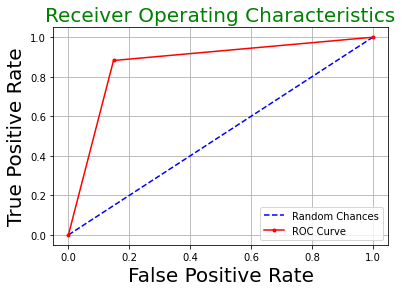

In [60]:
#importing accuracy_score from sklearn.metrics
#The accuracy score which helps in calculating the train and test accuracy based on the number of correctly classified data
from sklearn.metrics import accuracy_score

#calculating train accuracy for MLP
train_mlp_accuracy = grid_search_mlp.score(X_train_scaled,y_train)
print("Train accuracy of MLP {:.2f}%".format(train_mlp_accuracy*100))
train_accuracies.append(train_mlp_accuracy)

#calculating test accuracy for MLP
test_mlp_accuracy = accuracy_score(y_test,y_pred_mlp)
print("Test accuracy of MLP {:.2f}%".format(test_mlp_accuracy*100))
test_accuracies.append(test_mlp_accuracy)

#importing the classification report and confusin matrix from sklearn.metric
from sklearn.metrics import classification_report,confusion_matrix

clf = classification_report(y_test,y_pred_mlp)
print("\n\n Classification report for Multilayer Perceptron:")
print(clf)

from sklearn.metrics import plot_confusion_matrix
print("\n\n  Confusion Matrix for Multilayer Perceptron:")
plot_confusion_matrix(grid_search_mlp,X_test_scaled, y_test,cmap=plt.cm.Blues)
plt.show()

#Calculate AUC Value
print("AUC value i.e Area Under Curve \n\n")
auc_gnb = roc_auc_score(y_test,y_pred_mlp)
print("Area Under the Curve = %s \n\n" %auc_gnb)

#Plot ROC Curve
print("ROC Curve \n\n")

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]


fpr_dt, tpr_dt, _ = roc_curve(y_test,y_pred_mlp)                    # to plot random chances
ns_fpr,ns_tpr, _ = roc_curve(y_test, ns_probs)                       # to plot roc curve for the model



# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Chances',color='Blue') # plot the random chances for the model
plt.plot(fpr_dt, tpr_dt, marker='.', label='ROC Curve',color='Red')# plot the roc curve for the model
# axis labels
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver Operating Characteristics',fontsize=20,color='green')
plt.legend()
plt.grid()

#### Train Test accuracy for C4.5 Model

- ##### Importance of each feature using C4.5 model

In [61]:
if __name__ == '__main__':
   config = {'algorithm': 'C4.5', 'enableParallelism': True}
   model = chef.fit(heart_data, config)
   fi = chef.feature_importance()
   print(fi)

#predicting target for C4.5
pred=[]
for index, instance in heart_data.iterrows():
    prediction= chef.predict(model, instance)
    pred.append(prediction)
print(pred[0:5])

Regression  tree is going to be built...
MAE:  0.07150715071507151
RMSE:  0.193400466323216
Mean:  0.5445544554455446
MAE / Mean:  13.13131313131313 %
RMSE / Mean:  35.51535836117239 %
finished in  33.06723952293396  seconds
     feature  final_importance
0         ca          0.441120
1    restecg          0.341127
2    oldpeak          0.206006
3         cp          0.191265
4        fbs          0.155366
5        age          0.098685
6       chol          0.017152
7    thalach          0.014857
8      exang          0.007176
9   trestbps         -0.000722
10      thal         -0.008764
11     slope         -0.104716
12       sex         -0.358552
[1, 1, 1, 1, 1]


##### Calculated accuracy of C4.5 model

In [62]:
pred=[]
actual1=[]
a=0
for index, instance in heart_data.iterrows():
    prediction= chef.predict(model, instance)
    pred.append(int(prediction))
    actual=instance['Decision']
    actual1.append(actual)
    if actual == prediction:
        classified = True
        a=1+a
C45_tree_accuracy=(a/index)*100

print('Accuracy of C4.5 Tree is',C45_tree_accuracy,'%')


Accuracy of C4.5 Tree is 85.09933774834437 %


## Plotting Train & Test accuracies <a id="9"></a>

In [63]:
label = ['Naive Bayes','SVC','Decision tree','Random Forest','ADA Boost','KNN','MLP']
print(label)

#checking the train and test accuracies for all the parameter values
train_accurac = [round(num*100, 2) for num in train_accuracies]
print("Train Accuracies "+str(train_accurac))

test_accurac = [round(num*100, 2) for num in test_accuracies]
print("\nTest Accuracies "+str(test_accurac))

['Naive Bayes', 'SVC', 'Decision tree', 'Random Forest', 'ADA Boost', 'KNN', 'MLP']
Train Accuracies [83.47, 90.08, 85.54, 93.8, 88.02, 100.0, 92.98]

Test Accuracies [85.25, 85.25, 81.97, 85.25, 83.61, 85.25, 86.89]


In [64]:
#Accuracy dataframe
Acc_df = pd.DataFrame({'Model':label,'Train Accuracy': train_accurac,'Test Accuracy': test_accurac})
Acc_df.style.background_gradient(cmap='Blues')

,Model,Train Accuracy,Test Accuracy
0,Naive Bayes,83.470000,85.250000
1,SVC,90.080000,85.250000
2,Decision tree,85.540000,81.970000
3,Random Forest,93.800000,85.250000
4,ADA Boost,88.020000,83.610000
5,KNN,100.000000,85.250000
6,MLP,92.980000,86.890000


- All models train and test accuracy has been consolidated in this table to be able to compare them in a glance 
- In reference to the above table we see that KNN & Random Forest & MLP have the highest training accuracy of 100%, 93.8%, & 92.9%. However since KNN is showing 100% it is most definitely over fitting, therefore we will skip it and look at the next models with the highest accuracies which will be Random Forest & MLP with test accuracy of 85.2% and 86.8% 

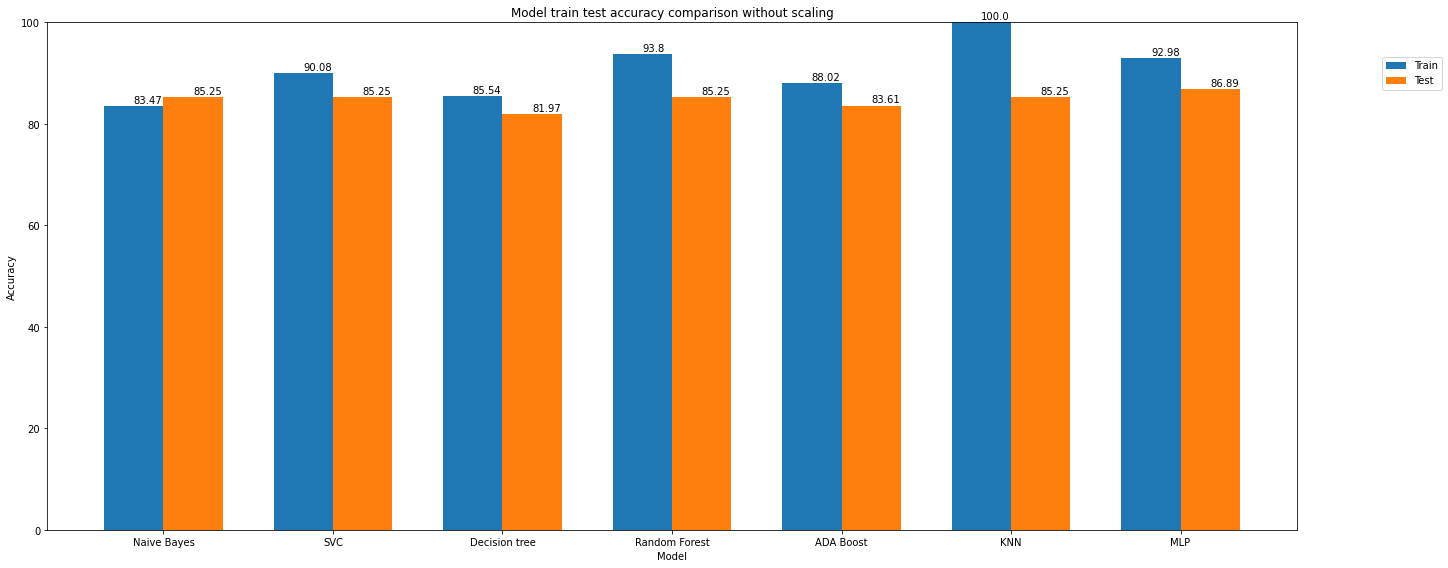

In [65]:
x = np.arange(len(label))  
width = 0.35  

#fig= plt.figure(figsize=(20,6))
fig, ax = plt.subplots(figsize=(20, 8))
bar1 = ax.bar(x - width/2, train_accurac, width, label='Train')
bar2 = ax.bar(x + width/2, test_accurac, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Model')
ax.set_title('Model train test accuracy comparison without scaling')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.set_ylim([0, 100])
ax.legend(loc='center right', bbox_to_anchor=(1.12, 0.9))


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        #print(height)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points")


autolabel(bar1)
autolabel(bar2)

fig.tight_layout()

plt.show()

### Results
- Based on the train and test accuracies we can see that Random forest and Multilayer perceptron are performing best as compared to others. The train accuracy for the KNN is 100% which means that it is trying to over fit the data and not able to unstand the features or the pattern in the data, hence it is not being taken into consideration.

##### As Random Forest and MultilayerPerceptron are performing better as compared to other models, so, we will take those two models and futher evaluate the models using different techniques, such as Bagging, & Voting and which ever model performs better with following techniques will be used with feature engineering and will be evaluated.

## Bagging <a id="10"></a>

- Bagging is a technique used to decrease the variance in the prediction by generating additional data for training from dataset using combinations with repetitions to produce multi-sets of the original data.

### Bagging on Random Forest ensemble using the best parameters obtained

In [66]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

kfold = KFold(n_splits=10)
rfc = RandomForestClassifier(max_depth=5,max_features='sqrt',n_estimators=100,random_state=0,n_jobs=-1)


model = BaggingClassifier(base_estimator=rfc, random_state=0)
results = cross_val_score(model, X_train_scaled, y_train.values.ravel(), cv=kfold)
print("Bagging score for Random forest is {:.2f}%".format(results.mean()*100))

Bagging score for Random forest is 83.93%


### Bagging on Multilayer perceptron using the best parameters obtained

In [67]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier


kfold = KFold(n_splits=10)
mlp = MLPClassifier(activation='logistic',alpha=0.1,learning_rate='constant',solver='lbfgs')

model = BaggingClassifier(base_estimator=abc, random_state=40)
results = cross_val_score(model, X_train_scaled, y_train.values.ravel(), cv=kfold)

print("Bagging score for Multilayer perceptron is {:.2f}%".format(results.mean()*100))

Bagging score for Multilayer perceptron is 78.57%


## Voting <a id="11"></a>

- A Voting Classifier is a machine learning model that trains on an number of models and predicts an output (class) based on their highest probability of chosen class as the output.
- Voting is also being applied on the two best performing classifiers, to see if we train a model on both of them, how would the predicted output be scored based on the probability og class chosen.

In [68]:
# Voting Ensemble for Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.ensemble import VotingClassifier

kfold = KFold(n_splits=10)

# create the sub models
estimators = []

model_1 = RandomForestClassifier(max_depth=5,max_features='sqrt',n_estimators=100,random_state=0,n_jobs=-1)
estimators.append(('Random forest', model_1))

model_2 = MLPClassifier(activation='logistic',alpha=0.1,learning_rate='constant',solver='lbfgs')
estimators.append(('Perceptron', model_2))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train_scaled, y_train.values.ravel(), cv=kfold)
print("Voting scores for 10 folds are",results)
print("\n\nVoting score is {:.2f}%".format(results.mean()*100))

Voting scores for 10 folds are [0.76       0.76       0.75       0.875      0.875      0.75
 0.83333333 0.875      0.91666667 0.83333333]


Voting score is 82.28%


### Feature Engineering <a id="12"></a>

- Feature engineering is the process of transforming raw data into features that better represent the problem to the predictive models,to increment the predictive power of the machine learning algorithms and result in improved model accuracy on unseen data. Generally, the feature engineering process is applied to generate additional features from the raw data.

- As we recognized that random Forest was our best classifier in temrs of accuracy performance, therefore the feature engineering will only be applied on RFC.

In [69]:
from sklearn.feature_selection import RFE 
classifier = RandomForestClassifier(max_depth=5,max_features='sqrt',n_estimators=100,random_state=0,n_jobs=-1)
rfe = RFE(classifier, 10)
rfe = rfe.fit(X_train_scaled, y_train.values.ravel())

In [70]:
print(rfe.support_)

[ True False  True  True  True False False  True  True  True  True  True
  True]


In [71]:
cols = X_train.columns[rfe.support_]
cols

Index(['age', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal'],
      dtype='object')

In [72]:
X_train_scaled = pd.DataFrame(data=X_train_scaled,
    columns=X_train.columns)

X_test_scaled = pd.DataFrame(data=X_test_scaled,
    columns=X_test.columns)


#### Building the Random forest model after feature engineering

In [73]:
# Build the model again after Feature Selection
rfc = RandomForestClassifier(max_depth=5,max_features='sqrt',n_estimators=100,random_state=0,n_jobs=-1)
rfc.fit(X_train_scaled[cols], y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', n_jobs=-1,
                       random_state=0)

In [74]:
#predicting target for DecisionTree
y_pred_rfc = rfc.predict(X_test_scaled[cols])
print(y_pred_rfc[0:5])

print(len(X_train_scaled),len(X_test_scaled))
print(len(y_pred_rfc),len(y_test))

[0 1 1 0 0]
242 61
61 61


#### Evaluating the model

Train accuracy of Random Forest 94.21%
Test accuracy of Random Forest 83.61%


 Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



  Confusion Matrix for Random Forest on train:


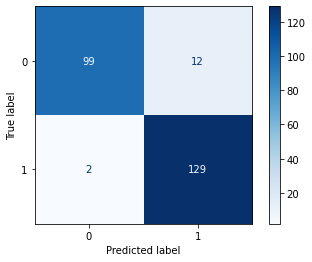



  Confusion Matrix for Random Forest on test:


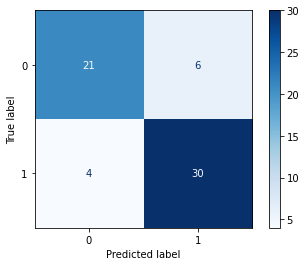

AUC value i.e Area Under Curve 


Area Under the Curve = 0.8300653594771241 


ROC Curve 




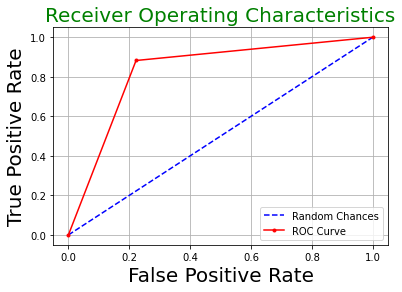

In [75]:
#importing accuracy_score from sklearn.metrics
#The accuracy score which helps in calculating the train and test accuracy based on the number of correctly classified data
from sklearn.metrics import accuracy_score

#calculating train accuracy for Random Forest
train_rfc_accuracy = rfc.score(X_train_scaled[cols],y_train)
print("Train accuracy of Random Forest {:.2f}%".format(train_rfc_accuracy*100))
train_accuracies.append(train_rfc_accuracy)

#calculating test accuracy for Random Forest
test_rfc_accuracy = accuracy_score(y_test,y_pred_rfc)
print("Test accuracy of Random Forest {:.2f}%".format(test_rfc_accuracy*100))
test_accuracies.append(test_rfc_accuracy)

#importing the classification report and confusin matrix from sklearn.metric
from sklearn.metrics import classification_report,confusion_matrix

clf = classification_report(y_test,y_pred_rfc)
print("\n\n Classification report for Random Forest:")
print(clf)

from sklearn.metrics import plot_confusion_matrix

print("\n\n  Confusion Matrix for Random Forest on train:")
plot_confusion_matrix(rfc,X_train_scaled[cols], y_train,cmap=plt.cm.Blues)
plt.show()

print("\n\n  Confusion Matrix for Random Forest on test:")
plot_confusion_matrix(rfc,X_test_scaled[cols], y_test,cmap=plt.cm.Blues)
plt.show()

#Calculate AUC Value
print("AUC value i.e Area Under Curve \n\n")
auc_gnb = roc_auc_score(y_test,y_pred_rfc)
print("Area Under the Curve = %s \n\n" %auc_gnb)

#Plot ROC Curve
print("ROC Curve \n\n")

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]


fpr_dt, tpr_dt, _ = roc_curve(y_test,y_pred_rfc)                    # to plot random chances
ns_fpr,ns_tpr, _ = roc_curve(y_test, ns_probs)                       # to plot roc curve for the model



# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Chances',color='Blue') # plot the random chances for the model
plt.plot(fpr_dt, tpr_dt, marker='.', label='ROC Curve',color='Red')# plot the roc curve for the model
# axis labels
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver Operating Characteristics',fontsize=20,color='green')
plt.legend()
plt.grid()

#### Feature Importance

In [76]:
importance = rfc.feature_importances_
importance_df = pd.DataFrame(importance).T
importance_df.columns = cols

importance_df

,age,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal
0,0.073054,0.172279,0.059594,0.056639,0.106793,0.064618,0.125134,0.032364,0.161061,0.148463


#### Plotting Important Features

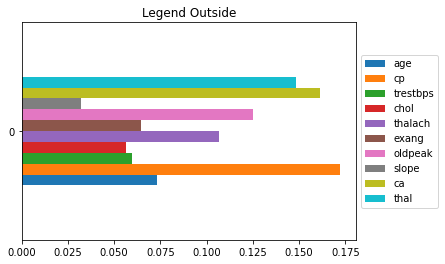

In [77]:
d = importance_df
f = plt.figure()
plt.title('Legend Outside', color='black')
d.plot(kind='barh', ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### Predicting on unseen data

In [78]:
data = [[25,1,1,120,200,0,0,150,0,1.3,1,0,1],        #Adult Male with chest pain
        [55,1,1,120,200,0,0,150,0,1.3,1,0,1],        #Senior Male with chest pain
        [25,0,1,120,200,0,0,150,0,1.3,1,0,1],        #Adullt Female with chest pain
        [55,0,1,120,200,0,0,150,0,1.3,1,0,1],        #Senior Female with chest pain
        [25,1,0,120,200,0,0,150,0,1.3,1,1,1],        #Adult Male without chest pain
        [55,1,0,120,200,0,0,150,0,1.3,1,1,1]]        #Senior Male without chest pain
prediction_df = pd.DataFrame(data,columns = X_test_scaled.columns)

In [79]:
prediction_df = mms.transform(prediction_df)
prediction_df

prediction_df_scaled = pd.DataFrame(prediction_df,columns = X_test_scaled.columns)
prediction_df_scaled[cols]

,age,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal
0,-0.083333,0.333333,0.265306,0.159353,0.603053,0.0,0.209677,0.5,0.00,0.333333
1,0.541667,0.333333,0.265306,0.159353,0.603053,0.0,0.209677,0.5,0.00,0.333333
2,-0.083333,0.333333,0.265306,0.159353,0.603053,0.0,0.209677,0.5,0.00,0.333333
3,0.541667,0.333333,0.265306,0.159353,0.603053,0.0,0.209677,0.5,0.00,0.333333
4,-0.083333,0.000000,0.265306,0.159353,0.603053,0.0,0.209677,0.5,0.25,0.333333
5,0.541667,0.000000,0.265306,0.159353,0.603053,0.0,0.209677,0.5,0.25,0.333333


#### Predicted results
- 1 risk of heart disease
- 0 risk of not having heart disease

In [80]:
heart_risk_prediction = rfc.predict(prediction_df_scaled[cols])
print(heart_risk_prediction)

[1 1 1 1 0 0]


### CONCLUSION
- The results that we got above shows that Random forest performs overall best as compared to other classifier models.
- The models were evaluated based on various performance metrics such as accuracy, precision, recall, F1 score and AUC ROC curve and by evluating on all the metrics, the results obtained by Random Forest shows it being one of the best classifier for the dataset.
- Post feature enginnering we can see that factors such as chest pain, ca, and thal are the ones that is causing the more heart disease. Also, by applying techniques such as Bagging, and voting we still observed that Random forest has best accuracy of all on unseen test data.

### References <a id="13"></a>
- https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/
- https://medium.com/swlh/the-hyperparameter-cheat-sheet-770f1fed32ff